<a href="https://colab.research.google.com/github/christinej1801/christinejrepo/blob/master/Quiz2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1**
**Consider a minimizing ∑i=1n (Yi - 1 Xi1-2Xi2--pXip )2 where each Xikis of the form Xik=I(i Gk). That is, each Xikis 1 if unit iis in group k. For example, icould be a person and group kis a characteristic, like a category of sleep disorder (none, mild, moderate, severe) and Yiis an outcome, say blood pressure.  Argue that the prediction for a person in group kis Y(k). That is, the outcome mean for subjects in group k. The Yiwere not centered.  (Hint, try breaking up the sum into groups. Use any fact we’ve established in class.)**

$$\sum^{n}_{i=1}(Y_i-\beta_1X_{i1}-\beta_2X_{i2} - ...-\beta_pX_{ip})^2$$

$$=\sum_{i\in G_1}(Y_i-\beta_1X_{i1}-\beta_2X_{i2} - ...-\beta_pX_{ip})^2 + \sum_{i\in G_2}(Y_i-\beta_1X_{i1}-\beta_2X_{i2} - ...-\beta_pX_{ip})^2+... + \sum_{i\in G_p}(Y_i-\beta_1X_{i1}-\beta_2X_{i2} - ...-\beta_pX_{ip})^2 $$

$$=\sum_{i\in G_1}(Y_i-\beta_1X_{i1})^2 + \sum_{i\in G_2}(Y_i-\beta_2X_{i2})^2 + ...+\sum_{i\in G_p}(Y_i-\beta_pX_{ip})^2  $$

$$=\sum_{i\in G_1}(Y_i-\beta_1)^2 + \sum_{i\in G_2}(Y_i-\beta_2)^2 + ...+\sum_{i\in G_p}(Y_i-\beta_p)^2 $$

In order to minimize these errors, we see that

$$\hat{\beta_1} = \overline{Y}^{(1)},\hat{\beta_2} = \overline{Y}^{(2)}, ... ,\hat{\beta_p} = \overline{Y}^{(p)} \ (*)$$

Thus, plugging into the equation, the prediction for a person in group K would be the following, since all the other $X$s would = 0 by the indicator variable.

$$\hat{\beta_k}X_{ik} = \hat{\beta_k} = \overline{Y}^{(k)} from \ (*)$$


**2. Load in the Kirby 21 data. Use a linear regression model to predict the left diencephalon volume from the right (type I level I). Report your regression coefficients and the in-sample error rate. (Don’t split the data in this example, there aren’t enough subjects for that.)  The in sample error rate is**
	**i=1n(Yi-0-1Xi)2**

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [0]:
! if [ ! -e kirby21.csv ] ; \
  then wget https://raw.githubusercontent.com/bcaffo/ds4bme_intro/master/data/kirby21.csv; \
fi

B0 = -694.1809221478507
B1 = 1.0675677731655158
Sample error = 832740.3005383236


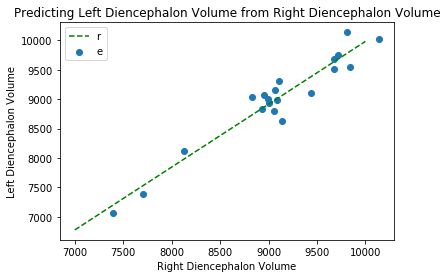

In [35]:
def find_preds(x, y):
  y_mean = np.mean(y)
  x_mean = np.mean(x)
  
  b1 = np.sum(np.multiply(x - x_mean, y - y_mean))/np.sum(np.square(x - x_mean))
  b0 = y_mean - b1*x_mean
  return [b0, b1]


  
df = pd.read_csv("/content/kirby21.csv")
df.drop(['Unnamed: 0', 'rawid', 'min', 'max', 'mean', 'std'],\
             axis = 1)

ld = df.loc[df['roi']== 'Diencephalon_L']
rd = df.loc[df['roi'] == 'Diencephalon_R']

ld = ld['volume']
rd = rd['volume']

m, b, r_value, p_value, std_err = stats.linregress(ld, rd)

x = np.linspace(7000, 10000)
#y = m*x + b

mles = find_preds(rd, ld)
b0 = mles[0]
b1 = mles[1]
fit_line = b1*x + b0


sample_err = np.sum(np.square(np.subtract(ld-b0, np.multiply(b1,rd))))

plt.figure()
plt.title('Predicting Left Diencephalon Volume from Right Diencephalon Volume')

plt.scatter(rd, ld)
plt.plot(x,fit_line, '--g')
plt.xlabel('Right Diencephalon Volume')
plt.ylabel('Left Diencephalon Volume')

print("B0 = " + str(b0))
print("B1 = " + str(b1))
print("Sample error = " + str(sample_err))


**Write a two sentence proposal for a project (you won’t be held to this) where you use data to either predict or classify an outcome measure.**


I want to see if I can use the average temperature in a month in New York to predict the rate of violent crime in that same month. I've heard the saying that ice cream sales are correlated to violent crime rates, but it's really because of hot weather, and I want to see how accurately temperature can be used to predict crime rates.